# Random Forest Regression

## Dataset

### Layout

* Columns: 3
    * Position
    * Level
    * Salary
* Rows: 11 observations
    * Each row represents one position
       * Features:
          * Position
          * Level
       * Dependent variable:
          * Salary

### Scenario

**HR Department**

* Department wants to hire a candidate for a specific position
* At the end of the interview process, department wants to know candidate's salary expectation
* Candidate is advanced in career and is asking for $160,000 per year
* Department asks candidate why he/she expects such a high salary?
    * Candidate indicates this is what the candidate earned at a previous position at another company

### Background

* Dataset contains salaries of positions from candidate's previous company
* Data was collected from a 3rd party job site, such as Glassdoor
* Candidate has been in a Region Manager position for the last 2 years
* After 2 years in the same position, candidate should be higher in salary, somewhere between Region Manager and Partner, which is levels 6 and 7, respectively
* Candidate's position will be considered level 6.5

### Wants to Understand

**HR Department**

* Is this salary expectation valid or a bluff?

### Goals

* Build decision tree regression to predict previous salary of candidate
	* Predict candidate salary between levels 6 and 7

## No Feature Scaling

* Since random forest regression uses many decision tree regressions, the terminal leaves from splits are used to compute the dependent variable $y$ for each regression then take the average of all $y$ values, so there is no need to scale features

## Import Libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Import Dataset

In [10]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, -1].values

In [11]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [12]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


## Split Dataset into Training Set and Test Set

Skipping this step to maximize the data in order to make future prediction of salary between levels 6 and 7.

## Train Random Forest Regression Model on Whole Dataset

In [13]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

## Visualize Random Forest Regression Results

### For Higher Resolution

/var/folders/12/tsb5ccqx5_32fy1lg_yqpddh0000gn/T/ipykernel_6529/3346561510.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


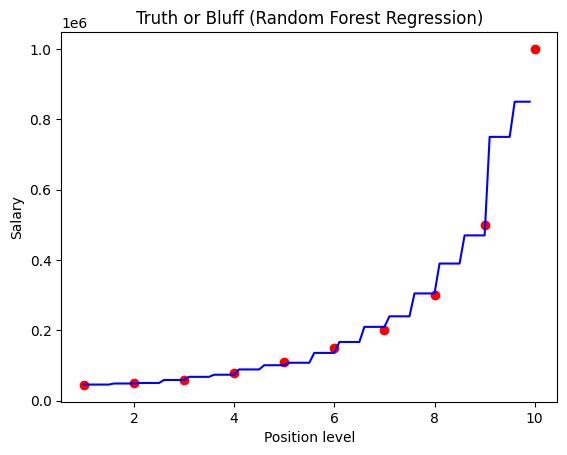

In [14]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predict New Result

Predict salary at position level 6.5 with decision tree regression.

In [15]:
regressor.predict([[6.5]])

array([167000.])

Random forest regression model predicts a salary higher than $160,000. Not so good prediction.

**Random forest regression is not a good choice to predict the salary expectation of the candidate.**